In [1]:
from datetime import datetime


from ecallisto_ng.plotting.plotting import (
    plot_with_fixed_resolution_mpl,
)

In [2]:
start_datetime = datetime(2023, 9, 25, 9, 5, 0)
end_datetime = datetime(2023, 9, 28, 9, 9, 0)

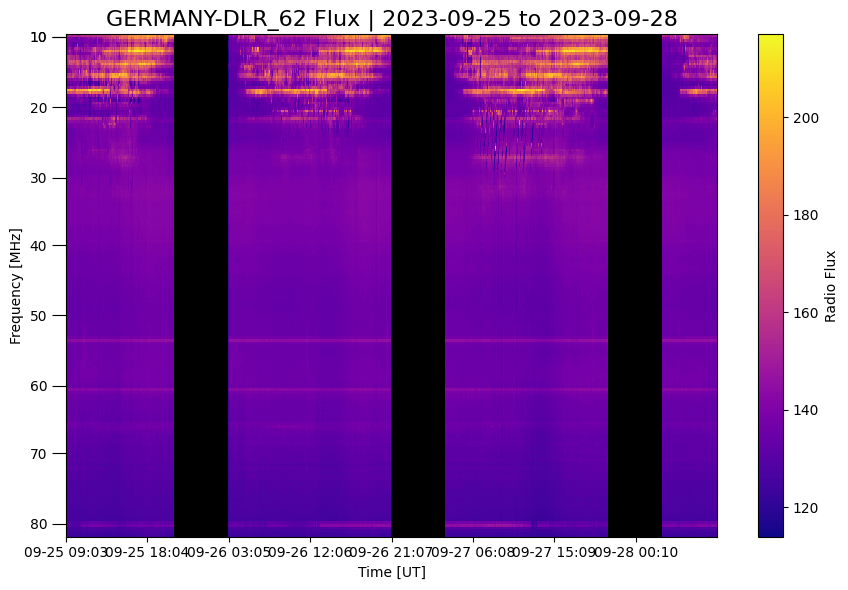

In [3]:
figure = plot_with_fixed_resolution_mpl(
    "GERMANY-DLR_62",
    start_datetime,
    end_datetime,
    sampling_method="MIN",
    resolution=1440,
)